# .

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np

In [2]:
x = np.random.randn(10,1,28,28)
x.shape

(10, 1, 28, 28)

In [3]:
print(x[0].shape)
print(x[1].shape)
x[0][0]

(1, 28, 28)
(1, 28, 28)


array([[-2.11313320e-01,  1.47559777e+00, -1.82983486e-01,
         1.22208839e+00,  3.27728233e+00,  2.03272311e-01,
         1.28645560e+00, -1.16168255e+00,  6.46761084e-01,
         1.05142848e-01, -2.35508963e-01, -1.07293317e+00,
         3.96454014e-01,  3.50564141e-02,  8.37732616e-01,
         1.36746197e-01,  1.71078881e+00,  9.94756415e-01,
         1.18342502e-01, -8.60932759e-01,  2.48654703e-01,
        -1.29357401e-01, -5.56301432e-01,  8.75977329e-01,
        -9.97121236e-01, -9.48758146e-01, -7.22430544e-01,
         1.58424299e-01],
       [ 7.94618199e-02,  6.06831830e-01,  8.72776205e-01,
         1.51106174e+00, -1.17096852e+00,  4.86548333e-01,
        -8.01487116e-02, -1.02747756e-01,  1.61062607e+00,
        -7.84416305e-01, -7.78085093e-01,  9.50584693e-01,
         1.43583753e+00, -1.15428272e+00,  6.99937855e-01,
        -5.43506973e-01, -1.13030866e+00, -5.43924160e-01,
        -1.88092520e+00,  4.44359659e-01,  6.88480100e-01,
        -1.35140049e+00, -1.72

In [4]:
## test

import sys, os
sys.path.append(os.pardir+'/..')
from common.util import im2col
import random

print(dir(np.random))

# x1 = np.random.rand(1,1,3,3) #(data cnt, channel cnt, H, W)
x1 = np.random.randint(0,10, size=(2,2,4,4)) #(data cnt, channel cnt, H, W)
col1 = im2col(x1, 2, 2, stride=1, pad=0)
print(col1.shape)

print(x1)
print(col1)

# x2 = np.random.rand(10,3,7,7)  #(data cnt, channel cnt, H, W)
# col2 = im2col(x2, 5, 5, stride=1, pad=0)
# print(col2.shape)

['Lock', 'RandomState', '__RandomState_ctor', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'beta', 'binomial', 'bytes', 'chisquare', 'choice', 'dirichlet', 'division', 'exponential', 'f', 'gamma', 'geometric', 'get_state', 'gumbel', 'hypergeometric', 'laplace', 'logistic', 'lognormal', 'logseries', 'mtrand', 'multinomial', 'multivariate_normal', 'negative_binomial', 'noncentral_chisquare', 'noncentral_f', 'normal', 'np', 'operator', 'pareto', 'permutation', 'poisson', 'power', 'print_function', 'rand', 'randint', 'randn', 'random', 'random_integers', 'random_sample', 'ranf', 'rayleigh', 'sample', 'seed', 'set_state', 'shuffle', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal', 'standard_t', 'test', 'triangular', 'uniform', 'vonmises', 'wald', 'warnings', 'weibull', 'zipf']
(18, 8)
[[[[8 6 4 1]
   [2 5 8 1]
   [8 1 8 6]
   [6 7 3 5]]

  [[6 1 1 2]
   [7 5 

In [5]:
import sys, os
sys.path.append(os.pardir+'/..')
from common.util import im2col
import random

x1 = np.random.rand(1,3,7,7) #(data cnt, channel cnt, H, W)
col1 = im2col(x1, 5, 5, stride=1, pad=0)
print(col1.shape)

x2 = np.random.rand(10,3,7,7)  #(data cnt, channel cnt, H, W)
col2 = im2col(x2, 5, 5, stride=1, pad=0)
print(col2.shape)



(9, 75)
(90, 75)


In [6]:
class Convolution:
    def __init__(self, W, b, stride=1, pad=0):
        self.W = W
        self.b = b
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        FN, C, FH, FW = self.W.shape
        N, C, H, W = x.shape
        
        print("init shape:", self.W.shape, x.shape)
        
        out_h = int(1 + (H + 2*self.pad - FH) / self.stride)
        out_w = int(1 + (W + 2*self.pad - FW) / self.stride)
        
        col = im2col(x, FH, FW, self.stride, self.pad)
        col_W = self.W.reshape(FN, -1).T
        
#         print("col shape:", col.shape, "col_W shape: ", col_W.shape)
        
        out = np.dot(col, col_W) + self.b
        
        print("out_h:", out_h, "out_w:", out_w)
        
        print(out.shape)
        print(out.reshape(N, out_h, out_w, -1).shape)
        out = out.reshape(N, out_h, out_w, -1).transpose(0, 3, 1, 2)
        
        print(out.shape)
        
        
        return out
        

In [7]:
x = np.random.rand(1,3,7,7)
b = np.random.rand(1)
f = np.random.rand(2,3,2,2)

a = Convolution(f,b, 1, 0)
a.forward(x)

init shape: (2, 3, 2, 2) (1, 3, 7, 7)
out_h: 6 out_w: 6
(36, 2)
(1, 6, 6, 2)
(1, 2, 6, 6)


array([[[[2.76650516, 4.71304168, 4.34248519, 3.63101234, 3.64829308,
          3.78727786],
         [3.22586312, 3.71203815, 4.09587084, 3.62290994, 3.68406302,
          4.03441273],
         [4.82534432, 4.52494827, 3.46250438, 3.73097161, 4.18061098,
          4.41332986],
         [5.00545096, 4.61596427, 3.76634979, 3.15418038, 3.23197508,
          3.0993685 ],
         [5.05286968, 5.04707113, 3.60062466, 3.24805011, 2.94196123,
          2.94385197],
         [4.41653814, 4.26240746, 3.30652865, 3.29402087, 3.45963414,
          3.48580584]],

        [[2.58077725, 4.12813553, 4.08933434, 3.25605502, 3.43186083,
          3.63919915],
         [3.24215965, 3.69674734, 3.97096671, 3.66297756, 3.47004867,
          3.93235521],
         [4.73753429, 4.40817624, 2.88505402, 3.87297141, 3.90694543,
          4.26809049],
         [4.41513999, 4.87661454, 3.88524781, 2.4743939 , 3.27355108,
          2.99642529],
         [4.79726128, 4.85910429, 3.67710918, 3.38223733, 3.21796134

In [8]:
class Pooling:
    def __init__(self, pool_h, pool_w, stride=1, pad=0):
        self.pool_h = pool_h
        self.pool_w = pool_w
        self.stride = stride
        self.pad = pad
        
    def forward(self, x):
        N, C, H, W = x.shape
        out_h = int(1 + ( H - self.pool_h ) / self.stride )
        out_w = int(1 + ( W - self.pool_w ) / self.stride )
        
        print(x)
        
        # make col
        col = im2col(x, self.pool_h, self.pool_w, self.stride, self.pad)  # 채널을 포함해서 전재
        print("col(ori): \n", col)
        col = col.reshape(-1, self.pool_h*self.pool_w)  # 채널도 분리해서 전개
        print("col: \n", col)
        
        # maxium value
        out = np.max(col, axis=1)
        print("out: \n", out.reshape(out.shape[0], -1))
        
        #
        out = out.reshape(N, out_h, out_w, C).transpose(0,3,1,2)
        
        return out
        

In [9]:
# x = np.random.rand(1,3,4,4)
x = np.random.randint(0,10, size=(1,2,4,4))

ap = Pooling(2, 2, 2, 0)
ap.forward(x)


[[[[7 2 1 4]
   [2 2 2 4]
   [2 0 5 0]
   [8 0 2 0]]

  [[0 5 0 4]
   [7 9 1 3]
   [4 3 5 3]
   [2 7 4 8]]]]
col(ori): 
 [[7. 2. 2. 2. 0. 5. 7. 9.]
 [1. 4. 2. 4. 0. 4. 1. 3.]
 [2. 0. 8. 0. 4. 3. 2. 7.]
 [5. 0. 2. 0. 5. 3. 4. 8.]]
col: 
 [[7. 2. 2. 2.]
 [0. 5. 7. 9.]
 [1. 4. 2. 4.]
 [0. 4. 1. 3.]
 [2. 0. 8. 0.]
 [4. 3. 2. 7.]
 [5. 0. 2. 0.]
 [5. 3. 4. 8.]]
out: 
 [[7.]
 [9.]
 [4.]
 [4.]
 [8.]
 [7.]
 [5.]
 [8.]]


array([[[[7., 4.],
         [8., 5.]],

        [[9., 4.],
         [7., 8.]]]])

In [10]:
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

In [15]:
from common.layers import *
import collections 

class SimpleConvNet:
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01 ):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1] # ????? 왜 1번째껄 뺴지??
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))  # ??? size 산정을 어떻게 한거지?
        
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)
        
        self.layers = collections.OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'],
                                           self.params['b1'],
                                           conv_param['stride'],
                                           conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'],
                                        self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'],
                                        self.params['b3'])
        
        self.last_layer = SoftmaxWithLoss()
        
    def prediction(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x

    def loss(self, x, t):
        y = self.predict(x)
        return self.last_layer.forward(y, t)
    
    def gradient(self, x, t):
        #forward propagation
        self.loss(x, t)
        
        #backpropagation
        dout = 1
        dout = self.last_layer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)
        
        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Conv1'].dw
        grads['b1'] = self.layers['Conv1'].db
        grads['W2'] = self.layers['Affine1'].dw
        grads['b2'] = self.layers['Affine1'].db
        grads['W3'] = self.layers['Affine2'].dw
        grads['b3'] = self.layers['Affine2'].db
        
        return grads
        
        
        
        
    
    




In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from simple_convnet import SimpleConvNet
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 20

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train loss:2.299255021244248
=== epoch:1, train acc:0.264, test acc:0.303 ===
train loss:2.2959203272095117
train loss:2.2903825775322795
train loss:2.288436267572318
train loss:2.278021626754027
train loss:2.2696638591233027
train loss:2.262477209076118
train loss:2.2351508092796806
train loss:2.2101507743165074
train loss:2.183253015148838
train loss:2.1735130002494194
train loss:2.106651582315572
train loss:2.0943943526890347
train loss:2.043321395929544
train loss:2.0168368142340443
train loss:1.9349105616223894
train loss:1.8708222244624875
train loss:1.8145554563971438
train loss:1.670667854750358
train loss:1.7007223756032965
train loss:1.5036807649953403
train loss:1.5597233532616124
train loss:1.425944084790403
train loss:1.358689876974936
train loss:1.302062319791255
train loss:1.195363854236212
train loss:1.0779400586588057
train loss:0.9908648052891904
train loss:0.9681074696667161
train loss:1.0164168082053355
train loss:0.904890792768187
train loss:0.8811289134640748
trai

train loss:0.19284769380458172
train loss:0.11117809803484845
train loss:0.19087633323031103
train loss:0.2540847500711996
train loss:0.3675003852217614
train loss:0.20881294662305386
train loss:0.22552936573225896
train loss:0.16926692725423645
train loss:0.1532817299154266
train loss:0.15711098839735896
train loss:0.11534359918333716
train loss:0.17291342717606742
train loss:0.2398192108674328
train loss:0.29680816288248896
train loss:0.1651738671148742
train loss:0.13762409570768888
train loss:0.2252879518519957
train loss:0.12798640086347474
train loss:0.19366684738942702
train loss:0.14328424251203128
train loss:0.2560205370616498
train loss:0.20809862108901506
train loss:0.276198234237498
train loss:0.21807960990766406
train loss:0.20301713132197174
train loss:0.09633069437718769
train loss:0.3733564923366558
train loss:0.12835484729889074
train loss:0.44451814920608035
train loss:0.20407249613308068
train loss:0.16386424636018251
train loss:0.37091690702565905
train loss:0.11779

train loss:0.09347926704851511
train loss:0.10440664799259261
train loss:0.08322520740714155
train loss:0.09044903380148588
train loss:0.18675280684016551
train loss:0.06548672958735065
train loss:0.16717185011273794
train loss:0.15572739941500546
train loss:0.06010153172423942
train loss:0.08819826447709815
train loss:0.10912036978768234
train loss:0.20820578136780007
train loss:0.13500398026100663
train loss:0.11417139734493409
train loss:0.11423118718374768
train loss:0.15020708456594067
train loss:0.07105566760481608
train loss:0.11806800295729182
train loss:0.0959126873378903
train loss:0.09561159154687678
train loss:0.14932486858229269
train loss:0.05897110130791696
train loss:0.1314681322607151
train loss:0.10055501164320661
train loss:0.14012578147028282
train loss:0.19257182408422385
train loss:0.15090642795627743
train loss:0.14788945458856462
train loss:0.1514608080134864
train loss:0.1255011590359488
train loss:0.06090497860910579
train loss:0.08959084857142913
train loss:0

train loss:0.07599775499729435
train loss:0.03428575387185655
train loss:0.07912850888329957
train loss:0.07530849222104209
train loss:0.08918608983635652
train loss:0.14075033132950324
train loss:0.06963624879302618
train loss:0.12890150953623467
train loss:0.04104864694332789
train loss:0.08135731244432291
train loss:0.04813136156702716
train loss:0.07809348602828374
train loss:0.11327885674191153
train loss:0.07731638397618752
train loss:0.06561333991541071
train loss:0.08642361450403896
train loss:0.06384088015278833
train loss:0.06048633195074291
train loss:0.061548718207172316
train loss:0.05532228608018525
train loss:0.06772793087211287
train loss:0.18685783908329254
train loss:0.01486235394627228
train loss:0.046146712199225844
train loss:0.07701686866116109
train loss:0.13344720218988
train loss:0.11080367821386129
train loss:0.035822903077428025
train loss:0.06385427225541129
train loss:0.07645410654491858
train loss:0.07115319112282088
train loss:0.1783872512712841
train los

train loss:0.06954343557235142
train loss:0.04199024141082512
train loss:0.05452823352289857
train loss:0.05187197798950541
train loss:0.05728292735420174
train loss:0.10177537795029179
train loss:0.04988898860281923
train loss:0.11639626203211453
train loss:0.16931976993169026
train loss:0.04741242862339246
train loss:0.0593583513424605
train loss:0.1359525096343514
train loss:0.02730843734881276
train loss:0.04910984338599984
train loss:0.04433008651464049
train loss:0.03626419324781265
train loss:0.05322211743891774
train loss:0.0857268029320018
train loss:0.06077826807253364
train loss:0.03525592061896582
train loss:0.03659843270504394
train loss:0.07127241043511968
train loss:0.018142980880585986
train loss:0.06517368555653548
train loss:0.03142052550080213
train loss:0.060199694321758195
train loss:0.025564317047005257
train loss:0.06930170315176225
train loss:0.04336780954073832
train loss:0.03247397086986657
train loss:0.08115462534159688
train loss:0.015001089969799168
train l

train loss:0.05342717742395887
train loss:0.1557861171981887
train loss:0.03078579537890198
train loss:0.10358043747731713
train loss:0.03973873110997737
train loss:0.03257566459504523
train loss:0.06315679461059097
train loss:0.025143224455671853
train loss:0.08768256004683041
train loss:0.060385578841538994
train loss:0.03747415527973697
train loss:0.036557899043453725
train loss:0.05898886860784958
train loss:0.03857537065549664
train loss:0.06753669439406682
train loss:0.05369884170461461
train loss:0.0358882525529556
train loss:0.05699016234902937
train loss:0.037310952670704445
train loss:0.08457261247830772
train loss:0.024905326544432036
train loss:0.09887845518549002
train loss:0.04311059245091018
train loss:0.03769494865918523
train loss:0.03053173618464075
train loss:0.04420513980576483
train loss:0.020578597446754308
train loss:0.21639286280855674
train loss:0.014642045830669576
train loss:0.09975151460705715
train loss:0.032402480159779215
train loss:0.03519708445792906
tr

train loss:0.033384425201794715
train loss:0.10933572645828425
train loss:0.06190110242055652
train loss:0.031903155875317495
train loss:0.062373041175695566
train loss:0.014073041761820424
train loss:0.08004353583163751
train loss:0.02278513576018556
train loss:0.07779610696231237
train loss:0.06948671404427033
train loss:0.05137262098678679
train loss:0.019275493005903845
train loss:0.05127328908197841
train loss:0.025488372791155216
train loss:0.012551342354425503
train loss:0.03997223350722484
train loss:0.07286053382633063
train loss:0.028300234259212343
train loss:0.017173715119634756
train loss:0.04690846245497421
train loss:0.02250088357678773
train loss:0.06367558362439486
train loss:0.009303431368547044
train loss:0.015941024815618942
train loss:0.03337794106627581
train loss:0.021027811024669066
train loss:0.0825425603612667
train loss:0.07259638171923877
train loss:0.037516110863878536
train loss:0.04505122298736798
train loss:0.03706096946292721
train loss:0.05893891662089

train loss:0.021629694888742498
train loss:0.13202187702415483
train loss:0.033170116566653834
train loss:0.05548072240332532
train loss:0.05925547533897109
train loss:0.0201478250969013
train loss:0.07910091258280848
train loss:0.026991334906955843
train loss:0.024099711077439852
train loss:0.010320414431242732
train loss:0.04946140520750555
train loss:0.010893157099695319
train loss:0.031539279471002685
train loss:0.09469377215591711
train loss:0.025275503632334707
train loss:0.03374650065055343
train loss:0.015483194653802263
train loss:0.037922396180569744
train loss:0.05158080548609029
train loss:0.017178386190134263
train loss:0.011084110329169165
train loss:0.0104692429156721
train loss:0.015082149597003118
train loss:0.015521998214768143
train loss:0.01621813244930136
train loss:0.05963336630500643
train loss:0.013672343583162766
train loss:0.040554827577766434
train loss:0.06551758433626062
train loss:0.02636235319927742
train loss:0.059183637506514036
train loss:0.05340285430

train loss:0.006332143839909115
train loss:0.005764877345796715
train loss:0.020932931337364066
train loss:0.007267845065432401
train loss:0.03200588885770951
train loss:0.011295639598786133
train loss:0.05385122901045813
train loss:0.02655379172163695
train loss:0.036721483770813426
train loss:0.03023662344071372
train loss:0.03264832036784227
train loss:0.06538140993598325
train loss:0.024744200527219134
train loss:0.02762379177470353
train loss:0.004822490369810129
train loss:0.0447258081868206
train loss:0.03833902173596505
train loss:0.020536495890692653
train loss:0.04562947077089757
train loss:0.015249079928807543
train loss:0.027998761800305166
train loss:0.06035662806358128
train loss:0.016787131519690256
train loss:0.03914343754076842
train loss:0.010018747934860364
train loss:0.048852075721690646
train loss:0.01157362387493197
train loss:0.011055332117413209
train loss:0.013078775538647251
train loss:0.06324563961567127
train loss:0.04730712671015815
train loss:0.01784129826

train loss:0.04833617322748432
train loss:0.029804664926314506
train loss:0.021212867175361
train loss:0.015307608546718565
train loss:0.010497375608431416
train loss:0.019697720560223703
train loss:0.033147582216791684
train loss:0.03764984662594608
train loss:0.04857279867541916
train loss:0.005595504604323812
train loss:0.09170651794067487
train loss:0.022439796762388196
train loss:0.019543144501910966
train loss:0.06342172699459141
train loss:0.01921100497035595
train loss:0.050393776312131294
train loss:0.03206509628018986
train loss:0.024561453448166595
train loss:0.036413477295295586
train loss:0.02072514126197382
train loss:0.06121434362089566
train loss:0.010561587829155233
train loss:0.017578642410253996
=== epoch:5, train acc:0.983, test acc:0.982 ===
train loss:0.05858368338181582
train loss:0.03443912666793199
train loss:0.0653504042712846
train loss:0.03213296937346728
train loss:0.04007054647901465
train loss:0.03789199839654596
train loss:0.017774645022917746
train loss

train loss:0.006094917581571575
train loss:0.014831285261531301
train loss:0.014983125183602081
train loss:0.025919480851607127
train loss:0.025929480852619452
train loss:0.009313422504196539
train loss:0.04218373434660217
train loss:0.004380384183909864
train loss:0.014175374631656657
train loss:0.02803485986332624
train loss:0.0710147672714068
train loss:0.026480933476686404
train loss:0.006188832668039278
train loss:0.031107293134035617
train loss:0.009469624216886172
train loss:0.06516685901992053
train loss:0.054005357187096766
train loss:0.040808176201045994
train loss:0.04642777600820998
train loss:0.008377084606230652
train loss:0.08196416046607985
train loss:0.008221452851526718
train loss:0.009038633885583425
train loss:0.009757577549920772
train loss:0.028246519395288043
train loss:0.018026976612800363
train loss:0.01380596192005873
train loss:0.016210741487520622
train loss:0.04532099912809618
train loss:0.019031216053980712
train loss:0.017996608607794874
train loss:0.0052

train loss:0.008635731300925405
train loss:0.0040665168816099865
train loss:0.0696829667522449
train loss:0.01514130439909235
train loss:0.020935227288494018
train loss:0.042291014957616155
train loss:0.010967167714846106
train loss:0.007897920546312989
train loss:0.012698453942251955
train loss:0.012157355977056649
train loss:0.031834517430695
train loss:0.020765631238280777
train loss:0.018528188668932393
train loss:0.0818449950321108
train loss:0.015368047720520002
train loss:0.019444617078275862
train loss:0.07004219008716722
train loss:0.01904091249455639
train loss:0.03473008807807518
train loss:0.03534583109064182
train loss:0.005734074607484041
train loss:0.047127474072500425
train loss:0.008513728743307178
train loss:0.013574690984775636
train loss:0.01592216078857363
train loss:0.05475829938972326
train loss:0.12880667611914615
train loss:0.04911244998492805
train loss:0.015037417051011496
train loss:0.025780042557803258
train loss:0.013166134942113265
train loss:0.0109638783

train loss:0.1690961593619683
train loss:0.031161887734027824
train loss:0.015583637737427429
train loss:0.01590413809150305
train loss:0.02323314319627011
train loss:0.020023386005217036
train loss:0.008784886526432096
train loss:0.04045379267830528
train loss:0.009450111525511581
train loss:0.02335121787671762
train loss:0.021178774397360097
train loss:0.00644228368113632
train loss:0.010366126246439112
train loss:0.005957403786928799
train loss:0.019504806332247084
train loss:0.017820568723275476
train loss:0.03509892128006162
train loss:0.008910686623717428
train loss:0.035955174854465595
train loss:0.014038001849332132
train loss:0.0936596936348187
train loss:0.003938806126811112
train loss:0.002611801971308963
train loss:0.020332805821353838
train loss:0.04402896716796795
train loss:0.008319989465871308
train loss:0.007623452988509437
train loss:0.02396580645433288
train loss:0.014001684557316381
train loss:0.017969005343530298
train loss:0.053447830946266324
train loss:0.0213426

train loss:0.013894053166831328
train loss:0.005397485647929883
train loss:0.0385870667974066
train loss:0.0467994788842686
train loss:0.023878551018104037
train loss:0.018459454309453865
train loss:0.03414537812337146
train loss:0.06325222250492868
train loss:0.01300867202962665
train loss:0.001893746867004881
train loss:0.017648397890856073
train loss:0.046812834002523715
train loss:0.009848527977325282
train loss:0.013243952578168083
train loss:0.01762276258001461
train loss:0.011279806408845763
train loss:0.014425809859800265
train loss:0.05286627066067154
train loss:0.016231481939086377
train loss:0.009426934043174936
train loss:0.026965449588731913
train loss:0.021175354847738245
train loss:0.01892900965948842
train loss:0.006450217845472732
train loss:0.0010826368432230327
train loss:0.00927333589170272
train loss:0.008988381018659614
train loss:0.024638760568624178
train loss:0.008148422839874197
train loss:0.008837913156971265
train loss:0.06708816722104066
train loss:0.009058

train loss:0.011811684916215646
train loss:0.011837122346420325
train loss:0.005702159456857787
train loss:0.008530308739117191
train loss:0.012516387751083356
train loss:0.0472204095214573
train loss:0.011676061866028951
train loss:0.02706480845363046
train loss:0.025512215198115248
train loss:0.044522288125958626
train loss:0.007590725605863955
train loss:0.02038665430525431
train loss:0.010599314682795714
train loss:0.008197010524867822
train loss:0.020038526932962836
train loss:0.006101370315430187
train loss:0.023017066127914595
train loss:0.005376294707597754
train loss:0.011146080197141896
train loss:0.020367821549659847
train loss:0.013193438933609636
train loss:0.0432973138536179
train loss:0.014754732604190204
train loss:0.011270428992973942
train loss:0.0046847123528258455
train loss:0.08583740667647234
train loss:0.0171515525423775
train loss:0.011473767389852355
train loss:0.012845026323503525
train loss:0.007352346850395605
train loss:0.039929623526422965
train loss:0.002

train loss:0.004512778850712693
train loss:0.04828093062838944
train loss:0.008247977016571165
train loss:0.003987413790930821
train loss:0.009103647192329626
train loss:0.0038324015698719726
train loss:0.005140075845862962
train loss:0.006499264989630806
train loss:0.006702418521087533
train loss:0.010127196518664859
train loss:0.011302691877638502
train loss:0.012771217145229621
train loss:0.005768925323414268
train loss:0.005788434454960195
train loss:0.04658358519205518
train loss:0.007150723050550704
train loss:0.007797127475459603
train loss:0.0013960255018002658
train loss:0.006549981349037634
train loss:0.003222986514304826
train loss:0.004623940622349603
train loss:0.008563719024893689
train loss:0.008185972661593228
train loss:0.012821761220219378
train loss:0.020459221953286807
train loss:0.012716987515627403
train loss:0.01121900746179767
train loss:0.01048252319297139
train loss:0.004416801728672885
train loss:0.01270823494015755
train loss:0.004012241604662074
train loss:

train loss:0.005145296721266172
train loss:0.0013864898424725588
train loss:0.0014284410064438254
train loss:0.015561079469582182
train loss:0.002296599549929259
train loss:0.0006633865003609925
train loss:0.001862372744513703
train loss:0.0030761863702823034
train loss:0.004784543434931123
train loss:0.016677606295363426
train loss:0.002837851561911903
train loss:0.022591872581323315
train loss:0.00342517357658015
=== epoch:8, train acc:0.992, test acc:0.987 ===
train loss:0.005983748510732301
train loss:0.015782434725120552
train loss:0.05419191543734712
train loss:0.002418600385227133
train loss:0.025698852058669053
train loss:0.003640087924587849
train loss:0.011717250061808397
train loss:0.0044295714577146025
train loss:0.0014764959753357984
train loss:0.017471539990204402
train loss:0.08829347531774438
train loss:0.032210356216349635
train loss:0.022428606715274742
train loss:0.008238881830903834
train loss:0.016973986161199748
train loss:0.02485144187296061
train loss:0.00548876

train loss:0.006846713208238505
train loss:0.021847644193103276
train loss:0.004948161495901768
train loss:0.002629708954457242
train loss:0.017129742690482976
train loss:0.0035223082987408177
train loss:0.0014165357941633818
train loss:0.004225876539266531
train loss:0.039714563659588566
train loss:0.0053319924425957255
train loss:0.00506295510136366
train loss:0.007380021645929233
train loss:0.0020738245703045195
train loss:0.0076617124918397905
train loss:0.00393812358103168
train loss:0.020899594141046935
train loss:0.009768953338420214
train loss:0.004718540379294241
train loss:0.03737872340648467
train loss:0.023199309320773177
train loss:0.03690835228568901
train loss:0.005277933597436319
train loss:0.013501482672633926
train loss:0.004536051431854386
train loss:0.005097218292393256
train loss:0.006334411247323449
train loss:0.005846227918647738
train loss:0.0023362446912956795
train loss:0.009467848182336728
train loss:0.0029293772271674055
train loss:0.027817010703405583
train

train loss:0.02563570917642262
train loss:0.004245580540164578
train loss:0.004806270028241814
train loss:0.012889576123512221
train loss:0.0015245163515429285
train loss:0.005722954029486832
train loss:0.000903243842203202
train loss:0.015496041151559371
train loss:0.0017005310752911964
train loss:0.03440913610905607
train loss:0.051258063179802756
train loss:0.0010438060013901673
train loss:0.004575738540800797
train loss:0.02016702237299198
train loss:0.030915710434332208
train loss:0.00905259168801031
train loss:0.0005544824343583322
train loss:0.0069919164323007975
train loss:0.005543240895014031
train loss:0.028197680363579707
train loss:0.001285890428961595
train loss:0.0035935141271486084
train loss:0.001715074892083774
train loss:0.0015137707938560974
train loss:0.002068336247231599
train loss:0.012622905337255283
train loss:0.0015113085621312951
train loss:0.03836749545363194
train loss:0.025192410093248453
train loss:0.004346326888948136
train loss:0.015544671165569717
train

train loss:0.006850833835056313
train loss:0.0023007489210166636
train loss:0.0017352481664054424
train loss:0.013888153084662487
train loss:0.006774813950154762
train loss:0.02087523803445922
train loss:0.0041259633779636914
train loss:0.01535954332865368
train loss:0.008534344541475338
train loss:0.006283041700193959
train loss:0.0007141013875310358
train loss:0.011775364505318625
train loss:0.016536722032342938
train loss:0.003385084477251427
train loss:0.03648247561679753
train loss:0.025367444392087653
train loss:0.013029889796173531
train loss:0.0020811666666427555
train loss:0.021910290612392427
train loss:0.0023502522266956507
train loss:0.0009164795030811496
train loss:0.04132845296146013
train loss:0.006083599993287215
train loss:0.022730780172734423
train loss:0.004450191440309574
train loss:0.0016100828199811772
train loss:0.002110893841081917
train loss:0.014548831379958084
train loss:0.001208427738677432
train loss:0.040361349378237904
train loss:0.02077768652375037
train

train loss:0.006073798189707862
train loss:0.026950592697532548
train loss:0.008129718690027396
train loss:0.007406366192633708
train loss:0.0116611581720173
train loss:0.020808383622719577
train loss:0.0024967076943655723
train loss:0.014020482798235777
train loss:0.004717065743756233
train loss:0.007997587321336468
train loss:0.017962160202108432
train loss:0.006226310302541154
train loss:0.004434093458958346
train loss:0.00180884965535011
train loss:0.010602375627895257
train loss:0.007740407127586947
train loss:0.0014126984549860794
train loss:0.010439036474085568
train loss:0.006653362950534397
train loss:0.0035752477933050242
train loss:0.005617307825657831
train loss:0.0015929163616975398
train loss:0.012690266129679433
train loss:0.021093249587926185
train loss:0.006467248689628623
train loss:0.007829695045778767
train loss:0.006178664381901942
train loss:0.006149750998061099
train loss:0.019176355347694195
train loss:0.019673837145008213
train loss:0.0027904814543191453
train 

train loss:0.010016663759939698
train loss:0.0055469773932751865
train loss:0.002082064758996909
train loss:0.0013918598068705698
train loss:0.003446141844636529
train loss:0.003981737788647711
train loss:0.003122477717878961
train loss:0.011267920233206578
train loss:0.015242289419922847
train loss:0.0021779961073191624
train loss:0.005368329442280015
train loss:0.009412491315119252
train loss:0.007831453456569597
train loss:0.0006298380685224918
train loss:0.0063546558852466475
train loss:0.007581140607664469
train loss:0.014256866871085632
train loss:0.014018060230346492
train loss:0.016963028209813904
train loss:0.008835306010916512
train loss:0.015491501617999181
train loss:0.0010592810061035493
train loss:0.01300446871593063
train loss:0.002138061192381486
train loss:0.010244228045533509
train loss:0.004384524147540666
train loss:0.0038904274003771382
train loss:0.004811263747343138
train loss:0.0018794562182646254
train loss:0.004582998416091282
train loss:0.010290228591853266
t

train loss:0.008982291760043951
train loss:0.0056239282198900006
train loss:0.0023943563443324404
train loss:0.00943664774469973
train loss:0.006410797293226743
train loss:0.002039623908323798
train loss:0.04637934840460619
train loss:0.003022328430892854
train loss:0.010700707334692458
train loss:0.011729544677258136
train loss:0.04386024687126554
train loss:0.0017496449571167403
train loss:0.0011222288226264295
train loss:0.01174381918280626
train loss:0.007346373439854597
train loss:0.015177492395155295
train loss:0.010984829079559047
train loss:0.004231463327525915
train loss:0.0011281739996805986
train loss:0.007763185292157077
train loss:0.0032276613721866684
train loss:0.004126641681005315
train loss:0.01643296995063557
train loss:0.0013525567840486912
train loss:0.008580196489700214
train loss:0.006800295488327877
train loss:0.003519685028562871
train loss:0.007128902628661323
train loss:0.0007314718596453304
train loss:0.008889140068103808
train loss:0.008771115153571178
train

train loss:0.002296451210802556
train loss:0.0019146289592749369
train loss:0.0006048760390647935
train loss:0.006503977008093258
train loss:0.018446653188334806
train loss:0.002440798108593348
train loss:0.001397109836928542
train loss:0.015397891380526219
train loss:0.004090984553916908
train loss:0.010178290273425207
train loss:0.05899405217684203
train loss:0.004393157168829375
train loss:0.001338160094315043
train loss:0.001275213613927085
train loss:0.0038691494621899084
train loss:0.0019937379239922696
train loss:0.0014689326445144037
train loss:0.0004871078567108718
train loss:0.002211563012071803
train loss:0.003644214618070277
train loss:0.042277822340637664
train loss:0.013929461491738477
train loss:0.0019366119498525141
train loss:0.003925156586136342
train loss:0.009811831609788683
=== epoch:11, train acc:0.992, test acc:0.986 ===
train loss:0.0070795153635543565
train loss:0.03080345063042384
train loss:0.007614381302081381
train loss:0.0008078602858532255
train loss:0.00

train loss:0.00531509158484068
train loss:0.002359442258278029
train loss:0.005409921671458362
train loss:0.005714557173119651
train loss:0.009457916039352093
train loss:0.000573848140422184
train loss:0.0014241834320707746
train loss:0.001174425055067785
train loss:0.01435641192148314
train loss:0.0213167037096525
train loss:0.0014689200051606754
train loss:0.011374769248147289
train loss:0.004894492159873945
train loss:0.00547231059485961
train loss:0.0032916681391197177
train loss:0.001858681334569406
train loss:0.004631552250805932
train loss:0.005426751401700716
train loss:0.0017855536814087043
train loss:0.0031909364521566196
train loss:0.0032207166904640767
train loss:0.0013759888940666873
train loss:0.023420082170185562
train loss:0.0009897905640558612
train loss:0.012911910173688588
train loss:0.003568498908373553
train loss:0.0008444814446229275
train loss:0.009040821069028582
train loss:0.005174679120267461
train loss:0.002017320187190099
train loss:0.0037783122662724926
tra

train loss:0.009991287467600673
train loss:0.002477388156754111
train loss:0.046151852172901325
train loss:0.0029115965531781567
train loss:0.004191630603700549
train loss:0.00768288536319319
train loss:0.005241250536038074
train loss:0.0031684502334146584
train loss:0.007646525303842957
train loss:0.003008229989229268
train loss:0.008158641069571848
train loss:0.027259022592506135
train loss:0.002570738915527954
train loss:0.009555785354274515
train loss:0.019054792454381034
train loss:0.007701688040981354
train loss:0.0007602825983318517
train loss:0.0011234810294926962
train loss:0.003059343319391064
train loss:0.0029990733376247815
train loss:0.0017935826476808386
train loss:0.0025572007014438257
train loss:0.0012911096660657756
train loss:0.00792432913864202
train loss:0.00037593032164111756
train loss:0.001416985566243618
train loss:0.002906911990700238
train loss:0.00425687956456872
train loss:0.003473150611158247
train loss:0.017829070078570094
train loss:0.002647386820670176
t

train loss:0.017203628472153197
train loss:0.00039354119516490026
train loss:0.0006592150702119663
train loss:0.0061674024508871165
train loss:0.001061922178613786
train loss:0.0008919664624601783
train loss:0.0026420089432459405
train loss:0.002046104907793712
train loss:0.006198589713456183
train loss:0.004406076714381137
train loss:0.0012852888440738966
train loss:0.019321597563382593
train loss:0.0018315421812033056
train loss:0.0015081072379872545
train loss:0.00304368642074816
train loss:0.0031849155249286582
train loss:0.006855753126978689
train loss:0.0008365169154987065
train loss:0.003595530905777648
train loss:0.0017169970542267388
train loss:0.014583998156038391
train loss:0.01034878280769548
train loss:0.006416990143933729
train loss:0.0013509697538514498
train loss:0.005340586069817977
train loss:0.0029303155927343926
train loss:0.002709513460575701
train loss:0.0028603615739573153
train loss:0.0005451339311441533
train loss:0.0012833584399539546
train loss:0.002891685471

train loss:0.002304676965487414
train loss:0.0011116669970896356
train loss:0.001536017326711464
train loss:0.0008236371585407908
train loss:0.0034206071533973348
train loss:0.014529153924404958
train loss:0.0034604214783868457
train loss:0.0003436549634639528
train loss:0.0052519643290340435
train loss:0.002680418836635465
train loss:0.003142539821084995
train loss:0.00032601241338944695
train loss:0.011136795689679839
train loss:0.0051359661716676485
train loss:0.004785308938453892
train loss:0.0025749165999382384
train loss:0.000456575556101525
train loss:0.001658535830134099
train loss:0.006640175581273253
train loss:0.0009022623082992353
train loss:0.0016443960024594873
train loss:0.00504052002300071
train loss:0.0058212048844738596
train loss:0.002170295597979871
train loss:0.00042057210969285557
train loss:0.0045949143967436434
train loss:0.002625468224745333
train loss:0.0011073602593615795
train loss:0.0010595086020726322
train loss:0.001391450659627006
train loss:0.0045245585

train loss:0.002568308302504102
train loss:0.0032910050361549116
train loss:0.028515257915499023
train loss:0.005207941090863605
train loss:0.0003797117667264207
train loss:0.002050699842852067
train loss:0.011351788925359131
train loss:0.005285587276925228
train loss:0.008778192869970286
train loss:0.001201812915020863
train loss:0.0006229816193227964
train loss:0.0016766881965797602
train loss:0.0067652913602656095
train loss:0.009705560600892005
train loss:0.0068909919229351215
train loss:0.0018032022476579671
train loss:0.007520309081923385
train loss:0.0013428281154743693
train loss:0.0032187729758161128
train loss:0.01723900197299401
train loss:0.0012631117814005785
train loss:0.01468792022444415
train loss:0.0015741114237902338
train loss:0.007527491055553776
train loss:0.01058195764449023
train loss:0.001551029552348202
train loss:0.003360582520643087
train loss:0.003708550825718288
train loss:0.0009646982130466952
train loss:0.0023866413752011238
train loss:0.00051944949391338

train loss:0.0009657435844386448
train loss:0.0002507479412885554
train loss:0.0007092114941974745
train loss:0.0069337385955353615
train loss:0.0014665232770095346
train loss:0.0018227446993812188
train loss:0.005480363708168809
train loss:0.0005646085558903684
train loss:0.0016771781914201958
train loss:0.004703767471713657
train loss:0.0006686624346368444
train loss:0.0027331567446420707
train loss:0.0005411376152375146
train loss:0.006511913275888974
train loss:0.0046349954525004245
train loss:0.007273610874040555
train loss:0.0011559142800097988
train loss:0.0019768413968120177
train loss:0.006215367899815907
train loss:0.0012503487703707404
train loss:0.0022196071720994907
train loss:0.0030396816896602593
train loss:0.055097144642874615
train loss:0.00015635747346631269
train loss:0.005206671024820183
train loss:0.0075677802032470065
train loss:0.005787639329466825
train loss:0.0057304636151156605
train loss:0.010957860860938164
train loss:0.005663114304799916
train loss:0.004419

train loss:0.011017886193338718
train loss:0.00106748296216361
train loss:0.0010596878511011604
train loss:0.0029451964066357617
train loss:0.004882508846166163
train loss:0.004717016226348096
train loss:0.0005800270374042557
train loss:0.009420293050410963
train loss:0.0014980755985122868
train loss:0.002897689336281573
train loss:0.0025363752965027074
train loss:0.00812310401146393
train loss:0.0007164612687606772
train loss:0.0017881963630411552
train loss:0.0004777611644172775
train loss:0.00019119158615738682
train loss:0.0016652912182103406
train loss:0.002911130670000475
train loss:0.000729554747599454
train loss:0.007695779220908977
train loss:0.003886296655555091
train loss:0.00046861678566200257
train loss:0.0051608120016458535
train loss:0.0007933390694993532
train loss:0.0005894307524987462
train loss:0.002100602215304971
train loss:0.0014647607510406466
train loss:0.0005660626285139796
train loss:0.002562325175869282
train loss:0.00046678555832667547
train loss:0.000836814

train loss:0.002322157080288889
train loss:0.00011377254629748055
train loss:0.021605160415035667
train loss:0.0016204870609955319
train loss:0.00037022683320841045
train loss:0.000828111712258526
train loss:0.004369007643564995
train loss:0.002875659977516794
train loss:0.002359012065786172
train loss:0.0037799367465739453
train loss:0.003085362437408213
train loss:0.0038980094514058016
train loss:0.003937643129217308
train loss:0.001624629817397793
train loss:0.0003461721877312678
train loss:0.007903840396222465
train loss:0.001887052767420642
train loss:0.004598038236537949
train loss:0.001127245568923059
train loss:0.001174715994118417
train loss:0.012812700510848896
train loss:0.0023841670591143913
train loss:0.0065026914995086095
train loss:0.000663208725619173
train loss:0.008846785541057577
train loss:0.002776594736707309
train loss:0.0002410297140216776
train loss:0.001360033713878666
train loss:0.005317335994014501
train loss:0.008490370388113113
train loss:0.0029948464985688

train loss:0.000758157193002926
train loss:0.0015413022542049102
train loss:0.005538320125887775
train loss:0.005882344933494533
train loss:0.0025856343238203476
train loss:0.0005760964357020997
train loss:0.0001787754270607686
train loss:0.0010460868282237757
train loss:0.0011819028507463524
train loss:0.0023464659846682166
train loss:0.00023083573279823185
train loss:0.0025197998215845045
train loss:0.000905167983764251
train loss:0.0003342338781582978
train loss:0.00375839707069115
train loss:0.0007391051712391718
train loss:0.0006614623761625654
train loss:0.002227667086119625
train loss:0.0008459487479658417
train loss:0.0006063540002320962
train loss:0.0005260401260128531
train loss:0.0013594352867550385
train loss:0.001761774092076976
train loss:0.0001555164894680131
train loss:0.002249761294232842
train loss:0.0012200530543924504
train loss:0.0017897922318555542
train loss:0.004019263584808823
train loss:0.0020345403224652017
train loss:0.0003838364155009234
train loss:0.001086

train loss:0.007558374767811368
train loss:0.01889875476434613
train loss:0.005274884440700862
train loss:0.0008463192484453906
train loss:0.002091804123901248
train loss:0.0002420223724767763
train loss:0.0025485149311650105
train loss:0.0015814487916164662
train loss:0.0008973020273474017
train loss:0.0069301521754132215
train loss:0.0028649886583366224
train loss:0.00338286335635696
train loss:0.0011961633867055162
train loss:0.0012601629385731608
train loss:0.0006412291809120468
train loss:0.0020765560841891108
train loss:0.002790014114065481
train loss:0.0003253257409325368
train loss:0.002359900557819033
train loss:0.00031029954161946845
train loss:0.007873718110781983
train loss:0.0007124777272995414
train loss:0.0016209711531940563
train loss:0.0007059920237240621
train loss:0.0069415198726386325
train loss:0.003765242174913358
train loss:0.0018964336178705246
train loss:0.000794442213802295
train loss:0.0031853632457526774
train loss:0.0005020862881887635
train loss:0.00168560

train loss:0.005866596707284547
train loss:0.0011252163254051953
train loss:0.0006394783609726862
train loss:0.004420653712689943
train loss:0.00018152361391039567
train loss:0.0006354556138492374
train loss:0.0016386773526597138
train loss:0.012561041553479724
train loss:0.0006882888775255593
train loss:0.0002442968460925201
train loss:0.0040797332685682626
train loss:0.0015456874438117545
train loss:0.0002794985959670303
train loss:0.0001275021675205897
train loss:0.0029352456193507638
train loss:0.0033574801604048217
train loss:0.00483360657991901
train loss:0.0015847026223102156
train loss:0.0013679354275579745
train loss:0.005021048276534276
train loss:0.00044139139394739344
train loss:0.0007435349590657972
train loss:0.0011410478297657729
train loss:0.005122394715911883
train loss:0.0009639816855105308
train loss:0.004365211438067429
train loss:0.0005148136868861417
train loss:0.004401628934755279
train loss:0.0037670524109770925
train loss:0.004406997563220679
train loss:0.00253

train loss:0.0012174520212215104
train loss:0.0012320701833676098
train loss:0.0001068355571260094
train loss:0.004394611932956386
train loss:0.0014597961981155083
train loss:0.028967120955414837
train loss:0.00022051937174558431
train loss:0.0014974936689347614
train loss:0.0034266319613598935
train loss:0.0016339329509341377
train loss:0.0005492109032848184
train loss:0.006205977763214526
train loss:0.003874150328396591
train loss:0.0019126193779907723
train loss:0.00135893389629893
train loss:0.0019109154850528965
train loss:0.00025348514823036637
train loss:0.0061840263713195745
train loss:0.0011992814477549186
train loss:0.0017067602192338876
train loss:0.002275671620600649
train loss:0.0022726626332620035
train loss:0.015649655963335035
train loss:0.004039761865758024
train loss:0.004466301992578239
train loss:0.002794769127834344
train loss:0.0006296400080784272
train loss:0.005706799421733406
train loss:0.00012830161198436327
train loss:0.0015129419474196606
train loss:0.002891

train loss:0.0005599577225147204
train loss:0.0007469768187443529
train loss:0.0026194766979690635
train loss:0.0014006169428106034
train loss:0.004181780055114336
train loss:0.00483700813407588
train loss:0.0004604121927919829
train loss:0.004042604412852707
train loss:0.0016520137261932077
train loss:0.002026415388626544
train loss:0.0002739329823943451
train loss:0.001232871840272333
train loss:0.0012050419428457006
train loss:0.0029688310059544417
train loss:0.00410460767038166
train loss:0.0008427803695850143
train loss:0.00030111855518557466
train loss:0.0010401589232271894
train loss:0.00012364956745002282
train loss:0.0049125032848711305
train loss:0.005062664274557226
train loss:0.000761640396161301
train loss:0.0012951027770197994
train loss:0.0015336439022701474
train loss:0.0005775950566992631
train loss:0.0026210166393935384
train loss:0.005296117604289105
train loss:0.0019981569426798114
train loss:0.0003175760311449479
train loss:0.00018609515502771362
train loss:0.00203

train loss:0.0003272736767589015
train loss:0.0008161989242028658
train loss:0.0003412102561694829
train loss:0.00663855839903238
train loss:0.0007040916847099627
train loss:0.000700730615473696
train loss:0.004870410428015017
train loss:0.0044894549104128835
train loss:0.001470374961482069
train loss:0.002595600567885814
train loss:0.0007456028521596796
train loss:0.002470955849318964
train loss:0.0019185608181547073
train loss:0.0010969304541487187
train loss:0.02356633938367411
train loss:0.0012811597454024204
train loss:0.001860583222978105
train loss:0.0024256499490436343
train loss:0.005994905467796519
train loss:0.004119033786747644
train loss:0.0004678155624686695
train loss:0.0015908646200220513
train loss:0.000988865691073748
train loss:0.0017951405414988115
train loss:0.000804719148163013
train loss:0.003729154540770833
train loss:0.0038419873213159424
train loss:0.0019991869384374215
train loss:0.004018741504788966
train loss:0.0007488504777688877
train loss:0.0013102656230

train loss:6.134224740817817e-05
train loss:0.0004632354520789054
train loss:0.0002746171953496576
train loss:0.007461682254718579
train loss:0.0004122097815939924
train loss:0.002066350160195843
train loss:0.00016358231125031066
train loss:0.0003239200263413515
train loss:0.0005824900588662696
train loss:0.000760115152614182
train loss:0.012574138428952253
train loss:0.00018114576311309766
train loss:0.001502194047798887
train loss:0.005368916907404344
train loss:0.0003148534375740161
train loss:0.000496997431767096
train loss:0.00022216087683247845
train loss:0.00015865691889867129
train loss:0.002415481345791173
train loss:0.0007391112429620283
train loss:0.012521654725853457
train loss:0.01739851000875686
train loss:0.0001480156895049651
train loss:0.006725945130649375
train loss:0.0004517952354457909
train loss:0.003002345207860226
train loss:3.297369247405473e-05
train loss:0.0008592663270018909
train loss:0.0016432503712419892
train loss:0.0010513381720091482
train loss:0.002473

train loss:0.0010529657745567199
train loss:0.0005710932078304836
train loss:0.0023340238189313487
train loss:7.689231379174589e-05
train loss:0.004839157397919516
train loss:0.00022776972308704074
train loss:9.446541245704946e-05
train loss:0.0004967872445875097
train loss:0.009197334390495178
train loss:3.1153434087414226e-05
train loss:0.00030611619363642747
train loss:0.002092846379469903
train loss:0.001522787529050825
train loss:0.022987553851993848
train loss:0.001704588705805925
train loss:0.0016176790879860944
train loss:0.0007342496852700047
train loss:0.0025229165865970743
train loss:0.0017780679300595217
train loss:0.0009453982491838622
train loss:0.0016125018714112766
train loss:0.0010395657030433556
train loss:0.0006448633271686992
train loss:0.001768321807145762
train loss:0.00015830541708437485
train loss:0.005139825983178755
train loss:0.002219599536312205
train loss:0.005107832789511788
train loss:0.0006355514787339145
train loss:0.004511860746390099
train loss:0.0007

train loss:0.005303981323787047
train loss:0.0003606337711563194
train loss:0.0009112878486169011
train loss:0.00141711374676337
train loss:0.0015504229427661474
train loss:0.0006413350402990978
train loss:0.0013077216777610287
train loss:0.0020972041281907463
train loss:0.0007033255014038724
train loss:0.0012026140674966461
train loss:0.00011901237292317107
train loss:0.000371075640093272
train loss:0.0077737423736645266
train loss:0.0004937973885678713
train loss:0.0013910830891050898
train loss:7.688529170061136e-05
train loss:0.0019155938768348666
train loss:0.0004600140554190827
train loss:0.0019491045801765577
train loss:0.0008795188257334872
train loss:0.0019647067338842313
train loss:0.0003797268193337925
train loss:0.001314482488509682
train loss:0.0015690028871614423
train loss:0.00011127158656323119
train loss:0.0063599710707554595
train loss:0.0004190850849583901
train loss:0.0005921366850843173
train loss:9.883782115352364e-05
train loss:0.0005043705355711676
train loss:0.

train loss:0.006701815222129752
train loss:0.0004509628839265635
train loss:0.00016725904823003241
train loss:0.0011986730212048854
train loss:0.00013084980389913955
train loss:0.000123232721153841
train loss:0.0014987479598743108
train loss:3.3977331677964834e-05
train loss:0.0009292695803871893
train loss:8.926858164096781e-05
train loss:0.00043624071527054777
train loss:0.0001940410866856577
train loss:0.0016355837145662286
train loss:0.004630351709614425
train loss:0.00016240936205365824
train loss:0.00027596451911307025
train loss:0.00018974978195428338
train loss:5.14527782960604e-05
train loss:5.512754826964227e-05
train loss:0.00011936527764903199
train loss:0.0008349946729798358
train loss:0.0037933956673174857
train loss:0.001344240745120438
train loss:0.00038420839757114666
train loss:0.004814762296980013
train loss:3.104798516792635e-05
train loss:0.0003922916835217553
train loss:0.0006794900221430166
train loss:0.0013357442365865566
train loss:0.002705410869573865
train lo

train loss:0.0013171678711036434
train loss:0.004693205392706743
train loss:0.0010157687881796832
train loss:0.006249146222856983
train loss:0.0006365163361257127
train loss:0.0003210968400116833
train loss:0.0013984235624920297
train loss:0.00143181094241912
train loss:0.001647572174775415
train loss:0.03581324548129513
train loss:0.000860966377470088
train loss:0.0004868433137959418
train loss:0.00236969563927222
train loss:0.0005505821120298176
train loss:0.0034626558438253185
train loss:3.231375160062262e-05
train loss:0.00011255007815782515
train loss:0.001325492144807733
train loss:0.0022526898125819284
train loss:0.0018420038433234703
train loss:0.001868826508879636
train loss:0.0013820078096163722
train loss:0.0019193264719474497
train loss:3.233740186955113e-05
train loss:0.0016324092661700346
train loss:0.0030275313772896674
train loss:0.0011202931113885027
train loss:5.9077212083032665e-05
train loss:0.014180192891942526
train loss:0.0007117367876028442
train loss:0.00011326

train loss:0.00016593675368924688
train loss:0.0025880559484132907
train loss:0.00029334117773442334
train loss:0.0013910571155203839
train loss:0.001106227434325453
train loss:0.0037637160731577995
train loss:0.0004383544730797217
train loss:0.00769681590773299
train loss:0.004956140818566469
train loss:0.001912425528492997
train loss:0.0007628077800373105
train loss:0.0001868496547125204
train loss:0.001021944481490892
train loss:0.0003988882415918334
train loss:0.0009671276636430176
train loss:0.0002366086132888008
train loss:0.004228247650501075
train loss:0.005550338148642035
train loss:0.00020369876753320606
train loss:3.946626342754826e-05
train loss:0.00015561369292041107
train loss:0.001362996041812996
train loss:0.005954943476448743
train loss:0.002904387066297854
train loss:0.00048826523272225053
train loss:0.002330022647247297
train loss:0.000814168527937575
train loss:0.00035175714245854535
train loss:0.0032828036943294723
train loss:0.0002681566382021797
train loss:0.0064

train loss:0.001268018815524901
train loss:0.001845797101665497
train loss:0.000350603981463172
train loss:0.0003025314215847649
train loss:6.791486929100383e-05
train loss:0.0005536161892198603
train loss:0.0005996181080345362
train loss:0.000989304659554484
train loss:0.0014577473324313684
train loss:0.0013002616589555707
train loss:0.0016011140555802878
train loss:0.00017168787558291898
train loss:7.837544813272798e-05
train loss:0.00047116329956909336
train loss:0.0012672155661562449
train loss:0.0008518331907420532
train loss:0.0043906779284493295
train loss:0.0006439278089646894
train loss:4.137845086946503e-05
train loss:0.0019261605376073932
train loss:0.0001606047421453139
train loss:0.0010772418071331928
train loss:0.0012268509974371377
train loss:0.0004989319469587468
train loss:0.0007539937799392763
train loss:0.00019293655175180692
train loss:0.00042849309886288295
train loss:0.00029681057633580194
train loss:0.00023656594472698433
train loss:0.00019019388914859016
train l

train loss:9.417843850643118e-06
train loss:0.0016774273211615615
train loss:7.938457151974571e-05
train loss:0.0013973451088627722
train loss:0.0006996229432843859
train loss:0.0003848654376250596
train loss:5.032236532807598e-05
train loss:0.0006077986202125993
train loss:2.4947325347575612e-05
train loss:8.978943413215762e-05
train loss:3.115245751331114e-05
train loss:0.0006409269712433055
train loss:0.00010465488327275406
train loss:0.0027754843254572405
train loss:0.0002578538449190477
train loss:0.0001742990416586018
train loss:0.0005808662710581234
train loss:0.0003993095933135577
train loss:0.0003119887513485239
train loss:0.0015780204282241036
train loss:0.0010403365399783058
train loss:8.140200413344319e-05
train loss:0.0004985526900951308
train loss:0.004544712477715113
train loss:0.0012952534844295534
train loss:0.0014420690463597136
train loss:0.0003918587207195738
train loss:0.0015168060266984335
train loss:0.004102554072789679
train loss:0.0004742976651025581
train loss

train loss:0.005075158468640972
train loss:0.004497394283176329
train loss:0.0021760553817962783
train loss:0.0008610241560906756
train loss:0.0003188600909527161
train loss:0.0002625560977836237
train loss:0.0005700684001287411
train loss:0.0005170772923112125
train loss:0.004059149758690142
train loss:0.001088543550782954
train loss:0.0002766010674720589
train loss:4.024580752489011e-05
train loss:0.002212297788678258
train loss:0.0007620325682281017
train loss:0.0008627836156156775
train loss:0.00029969614622590206
train loss:0.00025034142153191485
train loss:0.0008512667856963814
train loss:0.000918586075765638
train loss:0.0010009890892875573
train loss:0.0011526709233757775
train loss:0.0005982172953214285
train loss:0.000488211726499934
train loss:0.004759322484188512
train loss:0.0006242080824517027
train loss:0.000887125499184536
train loss:3.2832868968216475e-05
train loss:0.0012749766841822765
train loss:0.005084850266843807
train loss:0.0003029875218779131
train loss:0.0004

<Figure size 640x480 with 1 Axes>

- 필터 갯수를 30개를 주면 각 특징점 30개를 도출한다는 의미

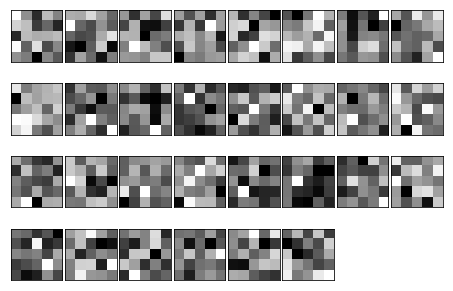

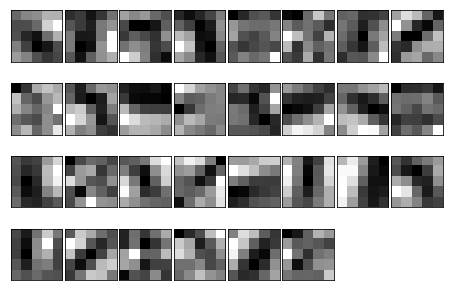

In [21]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
from simple_convnet import SimpleConvNet

def filter_show(filters, nx=8, margin=3, scale=10):
    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape
    ny = int(np.ceil(FN / nx))

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()


network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])

# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])
